In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the ASHRAE CSV file
file_path = "fe_simplified_ashrae_data.csv"
df = pd.read_csv(file_path)
df.head()

,year,year_delta,age,sex,thermal_sensation,thermal_comfort,clothing_insulation,metabolic_rate,air_temperature,relative_humidity,...,koppen_climate_Cwb,koppen_climate_Dfb,koppen_climate_Dwa,building_type_Multifamily housing,building_type_Office,building_type_Others,building_type_Senior center,cooling_strategy_Mechanically Ventilated,cooling_strategy_Mixed Mode,cooling_strategy_Naturally Ventilated
0,2000.0,18.0,-1.704718,0,-0.529958,0.210249,-1.587887,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
1,2000.0,18.0,-1.704718,0,-1.843510,0.210249,-1.587887,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
2,2000.0,18.0,-1.704718,1,0.291013,1.679869,-1.515120,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
3,2000.0,18.0,-1.809676,0,-2.171898,-1.259372,-1.660654,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False
4,2000.0,18.0,-1.704718,1,-0.529958,1.679869,-1.260434,-0.045071,-0.06435,0.287875,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Define features (X) and target (y)
X = df.drop(columns=["thermal_preference"])
y = df["thermal_preference"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print(f"Train Set Shape: {X_train.shape}, Test Set Shape: {X_test.shape}")

Train Set Shape: (68400, 66), Test Set Shape: (17100, 66)


# Logistic Regression

c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      5419
           1       0.70      0.87      0.78      8688
           2       0.77      0.44      0.56      2993

    accuracy                           0.73     17100
   macro avg       0.75      0.66      0.68     17100
weighted avg       0.74      0.73      0.72     17100

Accuracy: 0.7283625730994152


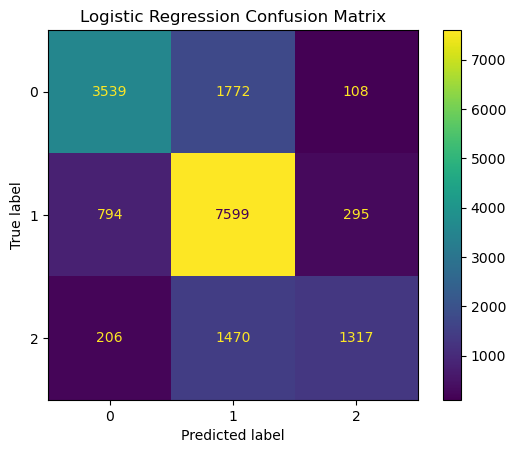

In [5]:
# Initialize the logistic regression model
log_reg_model = LogisticRegression(
    random_state=42, max_iter=1000, multi_class="multinomial"
)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred),
)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=log_reg_model.classes_
)
disp.plot(cmap="viridis")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# RANDOM FOREST

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5419
           1       0.79      0.83      0.81      8688
           2       0.79      0.66      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.78     17100
weighted avg       0.79      0.79      0.79     17100

Accuracy: 0.7911111111111111


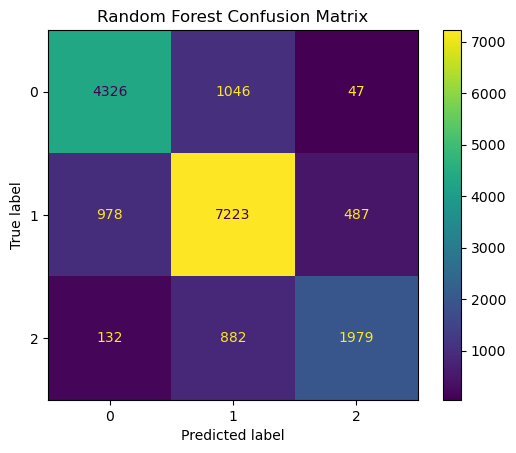

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=log_reg_model.classes_
)
disp.plot(cmap="viridis")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Gradient Boosting

### XGBoost

In [11]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install catboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 435.7 kB/s eta 0:03:54
   ---------------------------------------- 0.1/101.7 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.7/101.7 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.6/101.7 MB 7.7 MB/s eta 0:00:14
    --------------------------------------- 1.9/101.7 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 3.0/101.7 MB 10.8 MB/s eta 0:00:10
   - -------------------------------------- 4.1/101.7 MB 12.5 MB/s eta 0:00:08
   - -------------------------------------- 5.0/101.7 MB 13.3 MB/s eta 0:00:08
   -- ------------------------------------- 5.8/101.7 MB 13.3 MB/s eta 0:00:08
   -- ------------------------------------- 6.8/101.7 MB 14.0 MB/s eta 0:00:07
   ---

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.79     17100

XGBoost Accuracy: 0.7863157894736842


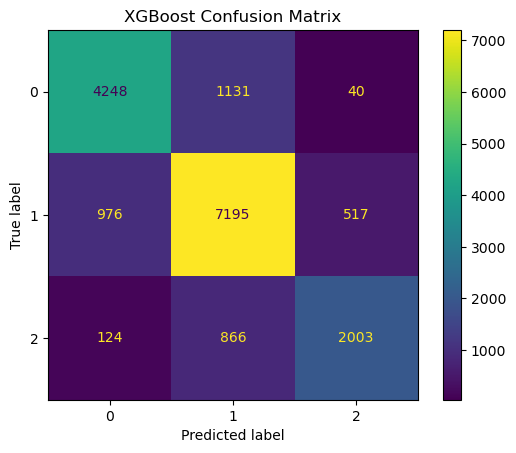

In [8]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric="mlogloss"
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp_xgb = ConfusionMatrixDisplay(
    confusion_matrix=cm_xgb, display_labels=xgb_model.classes_
)
disp_xgb.plot(cmap="viridis")
plt.title("XGBoost Confusion Matrix")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 68400, number of used features: 64
[LightGBM] [Info] Start training from score -1.149259
[LightGBM] [Info] Start training from score -0.677107
[LightGBM] [Info] Start training from score -1.742719
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.78   

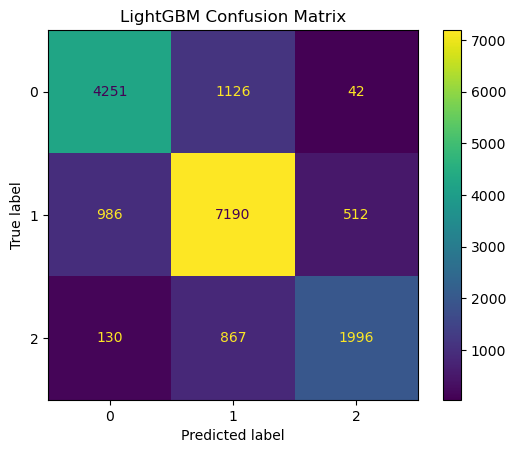

In [12]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

# Plot confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm, labels=lgbm_model.classes_)
disp_lgbm = ConfusionMatrixDisplay(
    confusion_matrix=cm_lgbm, display_labels=lgbm_model.classes_
)
disp_lgbm.plot(cmap="viridis")
plt.title("LightGBM Confusion Matrix")
plt.show()

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      5419
           1       0.79      0.83      0.81      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.79     17100

CatBoost Accuracy: 0.7864912280701755


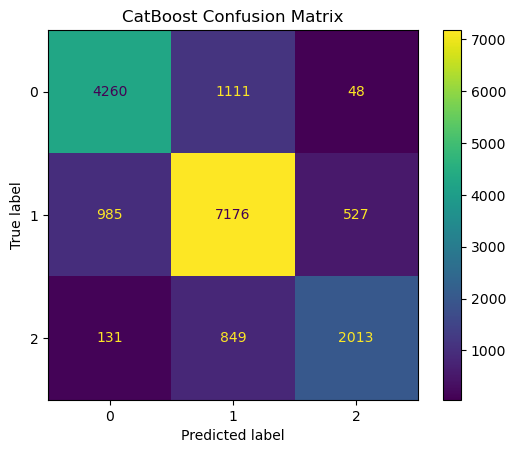

In [13]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
print(
    "CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost)
)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))

# Plot confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost, labels=catboost_model.classes_)
disp_catboost = ConfusionMatrixDisplay(
    confusion_matrix=cm_catboost, display_labels=catboost_model.classes_
)
disp_catboost.plot(cmap="viridis")
plt.title("CatBoost Confusion Matrix")
plt.show()

In [ ]:
# Print all accuracy scores for comparative analysis
print("Accuracy Scores for Comparative Analysis:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgbm)}")
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_catboost)}")

: 